In [1]:
import xgi
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import csv
from pathlib import Path

In [2]:
hyperedge_list = []
file_path: Path = Path("../EDF/data/data_s2233_p10_t21/")
with open(file_path / "hyperedges.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        # 读取每个超边的顶点列表，并将它们添加到 hyperedge_list 中
        hyperedge_list.append(row)

hyperedge_list = [[int(v) for v in edge] for edge in hyperedge_list]

hyperedge_list

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14],
 [0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 14],
 [0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 14],
 [0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 14],
 [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 14],
 [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 14],
 [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 14],
 [0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14],
 [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 14],
 [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14],
 [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 14],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 14],
 [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 14],
 [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 14],
 [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 14],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14],
 [0, 1, 2, 3, 4, 5, 6, 9, 10, 12, 14],
 [0, 1, 2, 3, 4, 5, 7, 9, 10, 12, 14],
 [0, 1, 2, 3, 4, 6, 7, 9, 10, 12, 14],
 [0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 14],
 [0, 1, 2, 4, 5, 6, 7, 9

In [3]:
H = xgi.Hypergraph(hyperedge_list)
print(f"The hypergraph has {H.num_nodes} nodes and {H.num_edges} edges")
I = xgi.incidence_matrix(H, sparse=False)
print(I)


The hypergraph has 21 nodes and 12644 edges
[[1 1 1 ... 0 1 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [4]:
# 超边的度，即超边尺寸
DE_lst = I.sum(axis=0)
print(f"DE_lst: {DE_lst}")
DE = np.diag(DE_lst)

DE_lst: [14 12 12 ...  4  5  3]


In [5]:
weights = [2**(x-1) - 1 for x in DE_lst]
print(f"weights: {weights}")
W = np.diag(weights)

weighted_node_degree = np.dot(I, weights)
weighted_node_degree

weights: [8191, 2047, 2047, 2047, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 2047, 2047, 2047, 2047, 2047, 1023, 1023, 2047, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 2047, 2047, 2047, 2047, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 511, 1023, 1023, 1023, 1023, 511, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 2047, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 1023, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 2047, 1023, 2047, 2047, 2047, 1023, 1023, 1023, 1023, 1023, 1023, 20

array([2241606, 1366437, 1447163, 1219189, 1433359, 1470641, 1223844,
       1396465, 1205732, 1154823, 1268368, 1291153, 1204662, 1004212,
       1170936,  964741,  280109,  138312,  118387,  424442,   21712])

<Axes: >

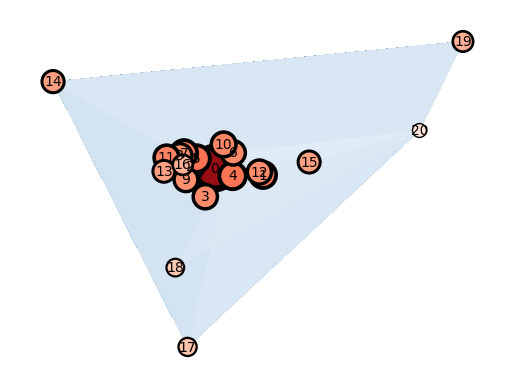

In [6]:

pos = xgi.barycenter_spring_layout(H)
xgi.draw(
    H,
    pos,
    node_labels=True,
    node_size=H.nodes.degree,
    node_lw=H.nodes.degree,
    node_fc=H.nodes.degree,
)

# pos_spiral = xgi.spiral_layout(H)
# xgi.draw(H, pos=pos_spiral, node_labels=True)

In [7]:
H.nodes.degree.asdict()

{0: 11738,
 1: 5515,
 2: 5829,
 3: 4779,
 4: 5721,
 5: 5783,
 6: 4812,
 7: 5567,
 8: 4632,
 9: 4577,
 10: 4968,
 11: 5119,
 12: 4722,
 13: 3864,
 14: 3968,
 15: 3923,
 16: 3119,
 17: 2380,
 18: 2177,
 19: 3250,
 20: 656}

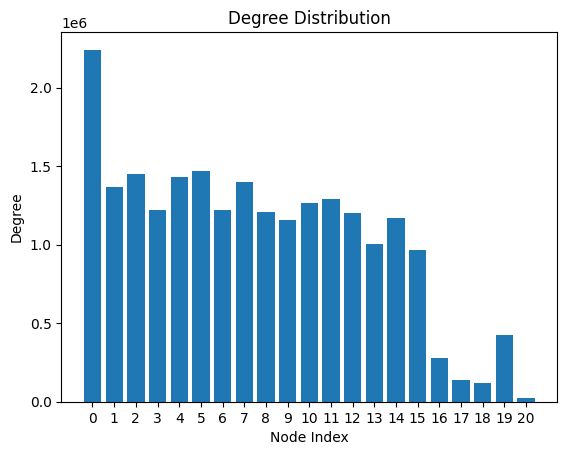

In [8]:
# 假设你已经有了表示每个节点度数的字典 degree_dict
# degree_values = H.nodes.degree.asdict().values()
degree_values = weighted_node_degree

# # 绘制度数随节点序号变化的曲线图
# plt.plot(range(len(degree_values)), H.nodes.degree.asdict().values())
# plt.xlabel('Node Index')
# plt.ylabel('Degree')
# plt.title('Degree Distribution')
# plt.show()

# 绘制节点度数的柱状图
plt.bar(range(len(degree_values)), degree_values)
plt.xticks(range(len(degree_values)), range(len(degree_values)))
plt.xlabel('Node Index')
plt.ylabel('Degree')
plt.title('Degree Distribution')
plt.show()